# Anomaly Detection

Table of Contents

- 1. Anomaly
- 2. Statistical Anomaly Detection
- 3. Deep Learning-based Anomaly Detection
- 4. Anomaly Detection with CAE in TensorFlow

![anomaly](./anomaly1.png)

### 1. Anomaly

- Anomalies and outliers are essentially the same thing
    - Objects that are different from most other objects
    - Something that deviates from what is standard, or expected (one classification)

#### Causes of Anomalies

- Data from different class of object or underlying mechanism
    - disease vs. non-disease
    - fraud vs. not fraud
- Data measurement and collection errors
- Natural variation
    - tails on a Gaussian distribution

Anomaly Detection

- Finding outliers

![out](./figure/outlier1.png)

#### Applications of Anomaly Detection

- Security & Surveillance


![out](./figure/outlier2.png)

- Biomedical Applications


![out](./figure/outlier3.png)

- Industrial Damage Detection


![out](./figure/outlier4.png)

- Machinery Defects Diagnostics
    - Diagnosis of machinery conditions
    - Early alarm of malfunctioning

Difficulties with Anomaly Detection

- Scarcity of Anomalies
    - It is not easy to get anomaly data, because anomaly rarely happens
    - Overfitting issue occurs when there is only small number of data
- Diverse Types of Anomalies
    - There are so many causes of anomalies
    - At the training stage of neural network, we cannot have all possible anomalies as input data

Use of Data Labels in Anomaly Detection

    -Supervised Anomaly Detection
        - Labels available for both normal data and anomalies
        - Similar to classification with high class imbalance
    -Semi-supervised Anomaly Detection
        -Labels available only for normal data
    -Unsupervised Anomaly Detection
        - No labels assumed
        - Based on the assumption that anomalies are very rare compared to normal data


Output of Anomaly Detection

- Label
  - Each test instance is given a normal or anomaly label
  - Same as the typical output of classification-based approaches

- Score
    - Each test instance is assigned an anomaly score
    - Allows outputs to be ranked in the order of anomaly scores
    - Requires an additional threshold parameter


Variants of Anomaly Detection Problem

- Given a dataset  D
 , find all the data points  x∈D
  with anomaly scores greater than some threshold  t
 
- Given a dataset  D
 , find all the data points  x∈D
  having the top-n largest anomaly scores
- Given a dataset  D
 , containing mostly normal data points, and a test point  x
 , compute the anomaly score of  x
  with respect to  D

## 2. Deep Learning-based Anomaly Detection¶


Convolutional AutoEncoder
- trained to compress/decompress normal images to/from the latent space
- For anomalous data, the reconstruction error (anomaly score) would be greater than that of normal images

![CAE](./figure/CAE.png)


- Train autoencoders only with normal data
    - Trained autoencoders will only capture features of normal data
    
    
- Test with (normal + anomaly) data

![ano](./figure/anomaly2.png)

#### Anomaly Score

- Reconstruction Error

![score](./figure/anomaly_score.png)

### Anomaly Detection with convolution

Import Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

Load MNIST Data

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

In [3]:
print('shape of x_train:', train_imgs.shape)
print('shape of y_train:', train_labels.shape)
print('shape of x_test:', test_imgs.shape)
print('shape of y_test:', test_labels.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


Seperate Normal and Abnormal Data

In [4]:
normal_train_index = np.hstack([np.where(train_labels == 7)])[0]
normal_test_index = np.hstack([np.where(test_labels == 7)])[0]
abnormal_test_index = np.hstack([np.where(test_labels == 5)])[0]

In [5]:
normal_train_x = train_imgs[normal_train_index].reshape(-1,28,28,1)
normal_train_y = train_labels[normal_train_index]

normal_test_x = test_imgs[normal_test_index].reshape(-1,28,28,1)
normal_test_y = test_labels[normal_test_index]

abnormal_test_x = test_imgs[abnormal_test_index].reshape(-1,28,28,1)
abnormal_test_y = test_labels[abnormal_test_index]

In [6]:
print('shape of normal_train_x:', normal_train_x.shape)
print('shape of normal_test_x:', normal_test_x.shape)
print('shape of abnormal_test_x:', abnormal_test_x.shape)

shape of normal_train_x: (6265, 28, 28, 1)
shape of normal_test_x: (1028, 28, 28, 1)
shape of abnormal_test_x: (892, 28, 28, 1)


Plot Normal and Abnormal Data


In [7]:
random.seed(6)
normal_rand_n = random.sample(range(normal_train_x.shape[0]), 10)

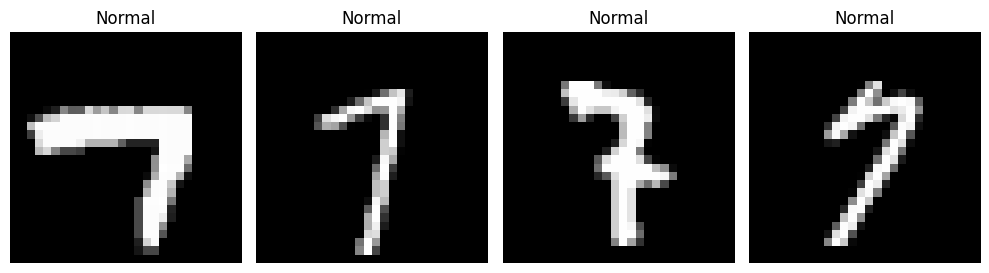

In [8]:
plt.figure(figsize = (10,4))
j = 1
for i in range(4):
    plt.subplot(1,4,j)
    plt.imshow(normal_train_x[normal_rand_n[i+5]], 'gray')
    plt.title('Normal')
    plt.axis('off')
    j += 1
plt.tight_layout()
plt.show()

In [11]:
random.seed(11)
normal_rand_a = random.sample(range(abnormal_test_x.shape[0]), 4)

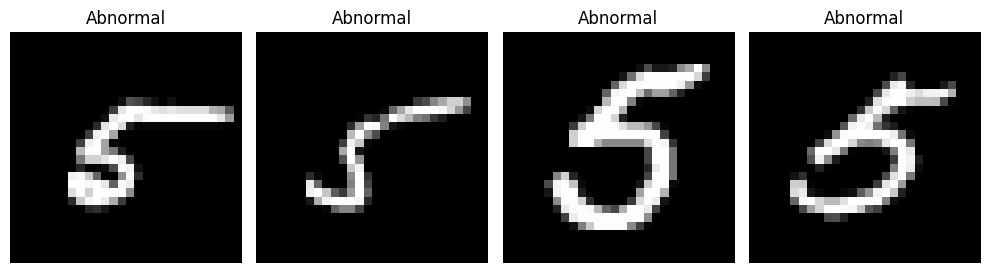

In [12]:
plt.figure(figsize = (10,4))
j = 1
for i in range(4):
    plt.subplot(1,4,j)
    plt.imshow(abnormal_test_x[normal_rand_a[i]], 'gray')
    plt.title('Abnormal')
    plt.axis('off')
    j += 1
plt.tight_layout()
plt.show()

In [13]:
# Encoder

encoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3), 
                           strides = (2,2), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           strides = (2,2), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),
    
    tf.keras.layers.Conv2D(filters = 2, 
                           kernel_size = (7,7),
                           padding = 'VALID',
                           input_shape = (7,7,64))
])

encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 2)           6274      
Total params: 25,090
Trainable params: 25,090
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Decoder

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2DTranspose(filters = 64, 
                                    kernel_size = (7,7),
                                    strides = (1,1), 
                                    activation = 'relu',
                                    padding = 'VALID',
                                    input_shape = (1, 1, 2)),

    tf.keras.layers.Conv2DTranspose(filters = 32, 
                                    kernel_size = (3,3),
                                    strides = (2,2), 
                                    activation = 'relu',
                                    padding = 'SAME',
                                    input_shape = (7, 7, 64)),

    tf.keras.layers.Conv2DTranspose(filters = 1, 
                                    kernel_size = (7,7),
                                    strides = (2,2),
                                    padding = 'SAME',
                                    input_shape = (14,14,32))
])

decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          6336      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         1569      
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


In [15]:
latent = encoder.output
result = decoder(latent)

In [16]:
model = tf.keras.Model(inputs = encoder.input, outputs = result)


In [17]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

In [18]:
model.fit(normal_train_x, normal_train_x, epochs = 10)


Epoch 1/10
196/196 [==============================] - 2s 7ms/step - loss: 0.0620
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0331
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0324
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0320
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0309
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0289
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0284
Epoch 8/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0278
Epoch 9/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0275
Epoch 10/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0272


Look at Latent Space


In [19]:
random.seed(2)
idx_n = np.random.choice(normal_test_x.shape[0], 1000)
idx_a = np.random.choice(abnormal_test_x.shape[0], 50)

In [20]:
test_x_n, test_y_n = normal_test_x[idx_n], normal_test_y[idx_n]
test_x_a, test_y_a = abnormal_test_x[idx_a], abnormal_test_y[idx_a]

In [21]:
normal_latent = encoder.predict(test_x_n)
normal_latent = normal_latent.reshape(-1,2)
abnormal_latent = encoder.predict(test_x_a)
abnormal_latent = abnormal_latent.reshape(-1,2)

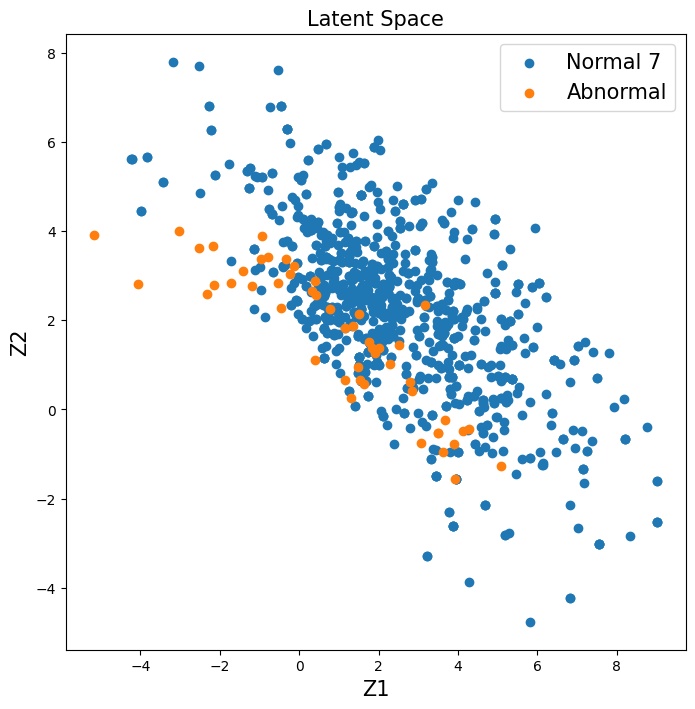

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(normal_latent[test_y_n == 7, 0], normal_latent[test_y_n == 7, 1], label = 'Normal 7')

plt.scatter(abnormal_latent[:, 0], abnormal_latent[:, 1], label = 'Abnormal')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [23]:
# Normal
normal_input = normal_test_x[0].reshape(-1,28,28,1)
normal_recon = model.predict(normal_input)
n_recon_err = model.evaluate(normal_input, normal_input)

1/1 [==============================] - 0s 85ms/step - loss: 0.0165


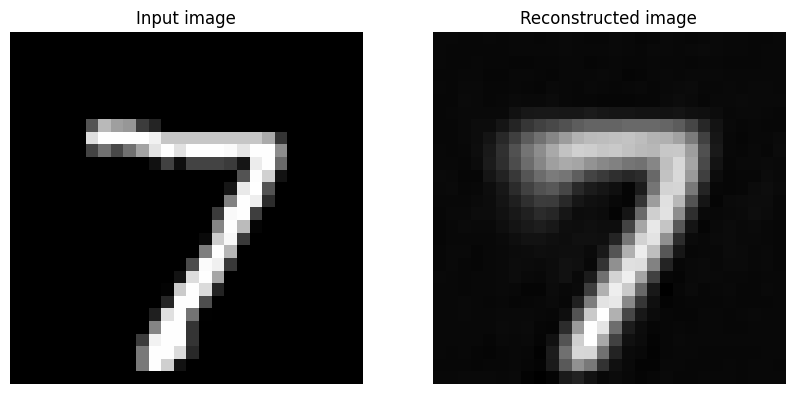

Reconstruciton error:  0.016498753800988197


In [24]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(normal_input[0], 'gray')
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(normal_recon[0], 'gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()
print('Reconstruciton error: ', n_recon_err)

In [25]:
# Abnormal
abnormal_input = abnormal_test_x[0].reshape(-1,28,28,1)
abnormal_recon = model.predict(abnormal_input)
ab_recon_err = model.evaluate(abnormal_input, abnormal_input)

1/1 [==============================] - 0s 12ms/step - loss: 0.1044


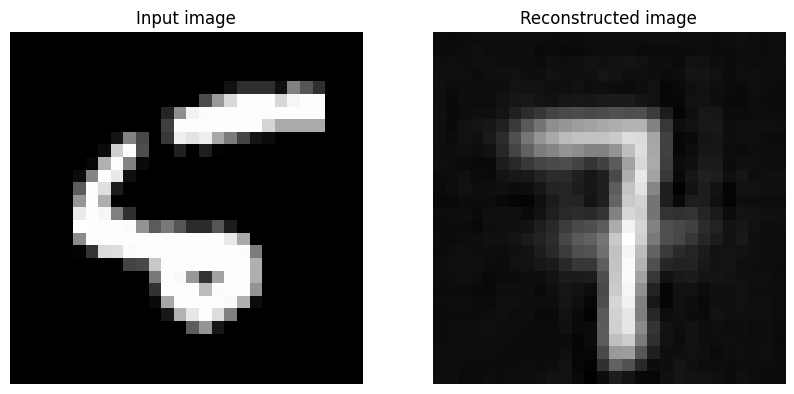

Reconstruciton error:  0.10441593080759048


In [26]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(abnormal_input[0], 'gray')
plt.title('Input image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(abnormal_recon[0], 'gray')
plt.title('Reconstructed image')
plt.axis('off')
plt.show()
print('Reconstruciton error: ', ab_recon_err)

Anomaly Detection

In [28]:
normal_err = []
abnormal_err = []

for i in range(200):
    img = normal_test_x[i].reshape(-1,28,28,1)
    normal_err.append(model.evaluate(img, img, verbose = 0))
    
for j in range(200):
    img = abnormal_test_x[j].reshape(-1,28,28,1)
    abnormal_err.append(model.evaluate(img, img, verbose = 0))

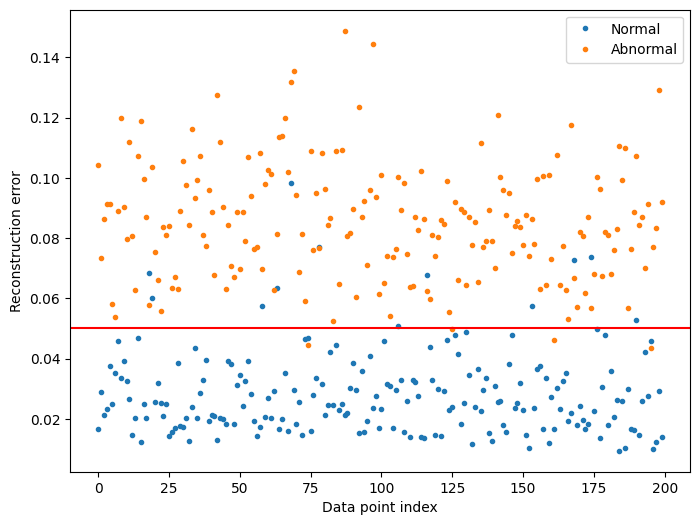

In [29]:
import scipy.stats as st
threshold = 0.05

plt.figure(figsize = (8, 6))
plt.plot(normal_err, '.', label = 'Normal')
plt.plot(abnormal_err, '.', label = 'Abnormal')
plt.xlabel('Data point index')
plt.ylabel('Reconstruction error')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.legend()
plt.show()